In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:28<00:00, 40.5MB/s]
100% 1.06G/1.06G [00:28<00:00, 40.6MB/s]


In [5]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [8]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [10]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1,activation="sigmoid"))


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 77s 107ms/step - loss: 1.4369 - accuracy: 0.5845 - val_loss: 0.6413 - val_accuracy: 0.6592
Epoch 2/10
625/625 [==============================] - 65s 104ms/step - loss: 0.5678 - accuracy: 0.7113 - val_loss: 0.5002 - val_accuracy: 0.7502
Epoch 3/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4947 - accuracy: 0.7642 - val_loss: 1.1223 - val_accuracy: 0.5930
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4631 - accuracy: 0.7884 - val_loss: 0.5016 - val_accuracy: 0.7596
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3831 - accuracy: 0.8292 - val_loss: 0.4330 - val_accuracy: 0.8040
Epoch 6/10
625/625 [==============================] - 65s 104ms/step - loss: 0.3229 - accuracy: 0.8625 - val_loss: 0.7722 - val_accuracy: 0.7392
Epoch 7/10
625/625 [==============================] - 65s 104ms/step - loss: 0.2636 - accuracy: 0.8899 - val_loss: 0.8743 - val_ac

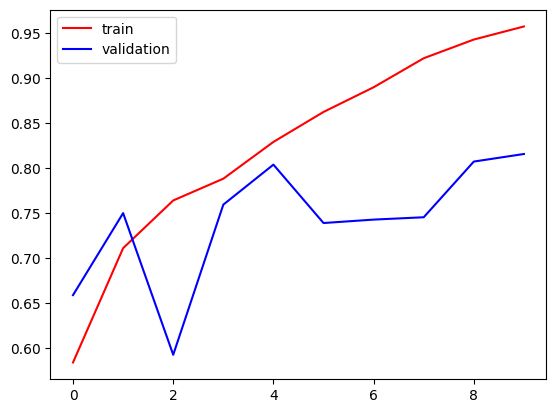

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

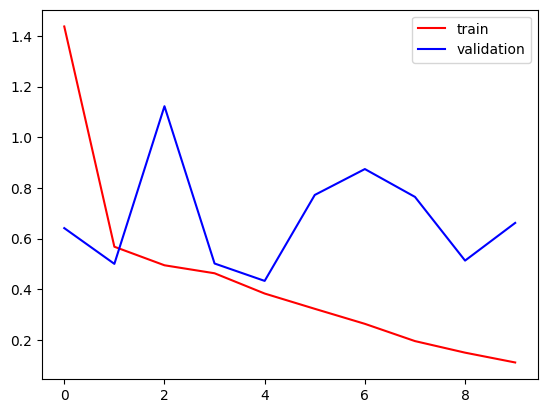

In [16]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [17]:
import cv2

In [18]:
test_image= cv2.imread('/content/cat.10.jpg')

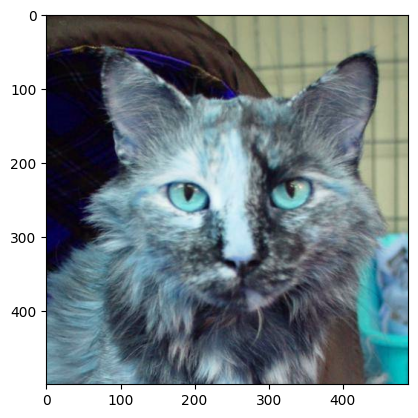

In [19]:
plt.imshow(test_image)

In [20]:
test_image.shape

(499, 489, 3)

In [21]:
test_image = cv2.resize(test_image,(256,256))

In [22]:
test_input= test_image.reshape(1,256,256,3)

In [23]:
model.predict(test_input)

1/1 [==============================] - 0s 389ms/step


array([[0.]], dtype=float32)

In [36]:
test_image= cv2.imread('/content/dog.10129.jpg')

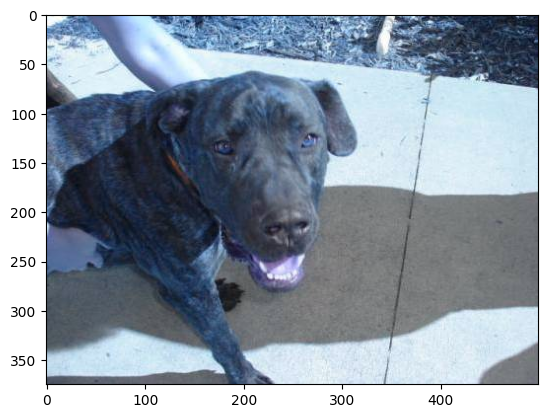

In [37]:
plt.imshow(test_image)

In [38]:
test_image.shape

(375, 499, 3)

In [40]:
test_image = cv2.resize(test_image,(256,256))

In [41]:
test_input= test_image.reshape(1,256,256,3)

In [42]:
model.predict(test_input)

1/1 [==============================] - 0s 23ms/step


array([[1.]], dtype=float32)